<a href="https://colab.research.google.com/github/lim4373/DL/blob/main/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 데이터셋 불러오기

In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### 2. 데이터셋 나누기

In [2]:
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist

In [3]:
X_train,y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

### 3.데이터셋 정규화

In [7]:
X_train,X_valid,X_test = X_train/255., X_valid/255., X_test/255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### 4. 이미지 확인하기

In [11]:
import matplotlib.pyplot as plt

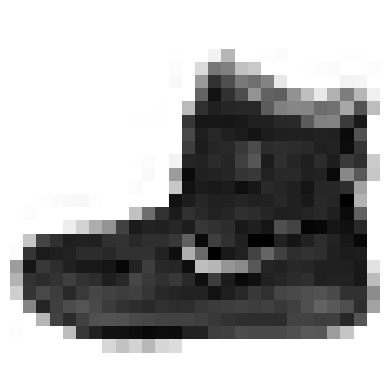

In [12]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [13]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

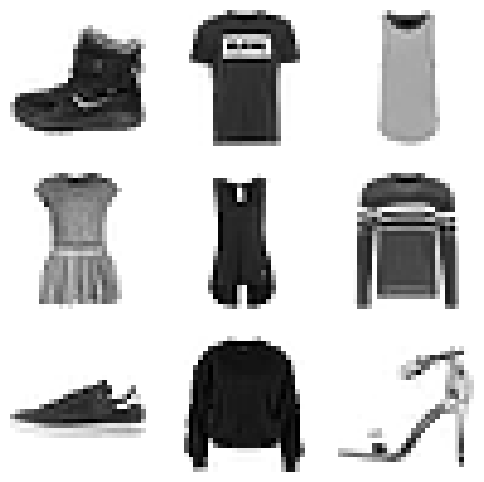

In [14]:
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(num_cols * 2, num_rows * 2))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
plt.show()


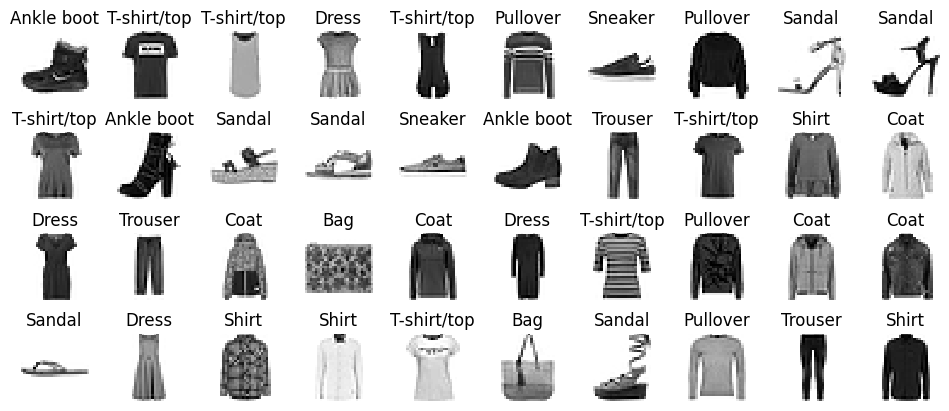

In [17]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 5. class_names 확인

In [15]:
class_names[y_train[0]]

'Ankle boot'

### 6. 시퀀셜 API로 모델 만들기

In [18]:
tf.random.set_seed(42)
model= tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28,]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [20]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)# 은닉층과 출력 층의 랜덤한 가중치가 시행

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),#예를들어 [32,28,28]의 크기 배치를 받으면 [32,784]로 크기를 변경함
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.layers

In [22]:
hidden1= model.layers[1]
hidden1.name

'dense'

In [24]:
model.get_layer('dense') is hidden1

True

In [25]:
weights, biaese =hidden1.get_weights()
weights

array([[ 0.01168425, -0.06665256, -0.01510861, ...,  0.04717152,
        -0.00976767, -0.04434408],
       [-0.06159003,  0.05154486,  0.0254726 , ..., -0.01401054,
         0.0577478 ,  0.00430486],
       [ 0.01637493,  0.0695006 ,  0.00243822, ..., -0.03922228,
         0.049811  , -0.06378327],
       ...,
       [ 0.04314744,  0.01062716, -0.04565298, ..., -0.020181  ,
         0.01469439,  0.0300905 ],
       [-0.0166782 , -0.04137888,  0.06191985, ...,  0.0425606 ,
         0.00081406,  0.06784517],
       [-0.03141198,  0.03284228,  0.05726522, ...,  0.05688362,
         0.0113129 , -0.01866734]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7309 - accuracy: 0.7635 - val_loss: 0.5087 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4921 - accuracy: 0.8305 - val_loss: 0.4643 - val_accuracy: 0.8336
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4453 - accuracy: 0.8443 - val_loss: 0.4259 - val_accuracy: 0.8486
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4208 - accuracy: 0.8537 - val_loss: 0.3989 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3999 - accuracy: 0.8606 - val_loss: 0.3990 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3834 - accuracy: 0.8657 - val_loss: 0.3955 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3700 - accuracy: 0.8693 - val_loss: 0.3711 - val_accura

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

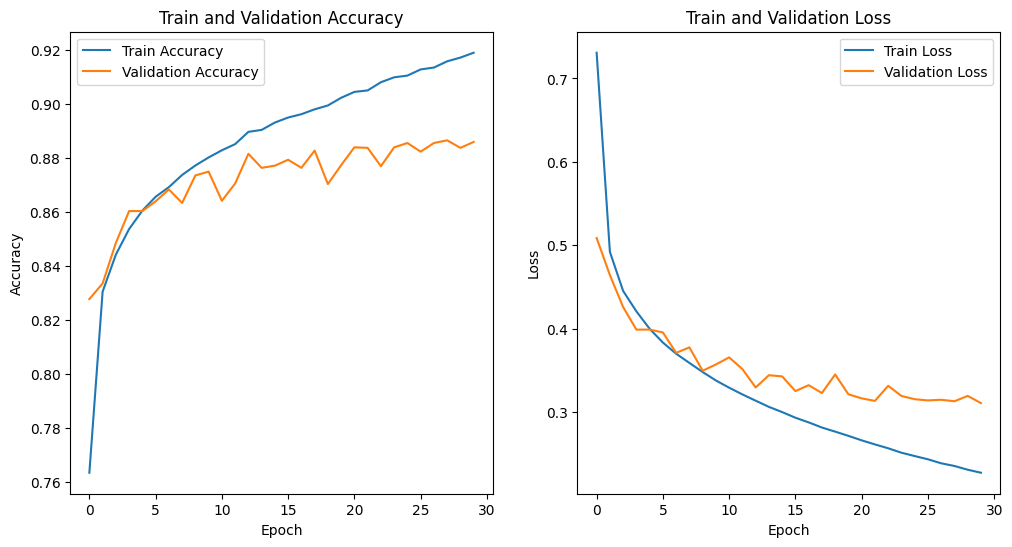

In [33]:
# train acc, val acc / train loss, val loss 그래프로 그리기

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 6. 모델 평가하기

In [36]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8858


[0.3276103138923645, 0.8858000040054321]

In [38]:
X_new= X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 34ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
y_pred = y_proba.argmax(axis=-1) # argmax는 배열에서 가장 큰 값의 인덱스를 반환, axis=-1은 마지막 축을 나타냄, 2차원 배열이라면 axis = 0은 행에따라서 가장 큰 값을 찾고 , axis=1이라면 열을 따라 가장 큰 값을 나타냄
y_pred

array([9, 2, 1])

In [40]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new =y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

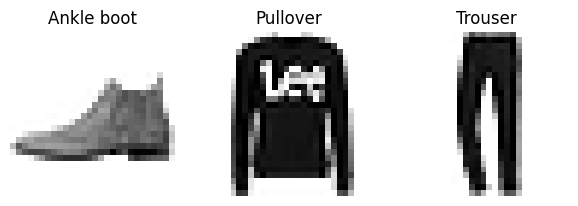

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.캘리포니아 주택 데이터셋

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [46]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.8619 - root_mean_squared_error: 0.9284 - val_loss: 0.4314 - val_root_mean_squared_error: 0.6568
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3773 - root_mean_squared_error: 0.6142 - val_loss: 0.8500 - val_root_mean_squared_error: 0.9219
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3546 - root_mean_squared_error: 0.5954 - val_loss: 0.3372 - val_root_mean_squared_error: 0.5807
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3405 - root_mean_squared_error: 0.5835 - val_loss: 2.4220 - val_root_mean_squared_error: 1.5563
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3333 - root_mean_squared_error: 0.5773 - val_loss: 7.7641 - val_root_mean_squared_error: 2.7864
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3835 - root_mean_squared_error: 0.6193 - val_loss: 0.5439 - val_

In [48]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 2s 12ms/step - loss: 0.2903 - root_mean_squared_error: 0.5388


[0.29034438729286194, 0.5388361215591431]